XYZ kompaniyasida taxminan 4000 ishchi xodim ishlaydi va afsuski har yili xodimlarning 15% ga yaqini o'z xohishlari bilan yoki kompaniya tomonidan ishdan bo'shatiladi va yana yangi xodim ishga olinadi. Bu esa kompaniya uchun bir qancha noqulayliklar tug'diradi (loyihalar sekinlashishi, ishga qabul qilish jarayoni uzoqligi, yangi ishchi ko'nikishi uchun treninglar va ma'lum vaqt kerakligi). Ishchilarni saqlab qolish uchun kompaniya HR tahlil qilib ko'rishga qaror qilishdi va quyidagi datasetdan foydalanib, qanday faktorlar ishchilarni bo'shashiga sabab bo'lishini tahlil qilish bizga topshirildi. Dataset ustun nomlari:

Age - yoshi
Attrition - ishdan bo'shaganmi
BusinessTravel - komandirovka
DistanceFromHome - uydan ishgacha bo'lgan masofa (km)
Education - Ta'lim
Gender - jinsi
MaritalStatus - oilaviy holati


Kerakli kutubxonalarni o'rnatamiz

In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

DATAFRAMEni chaqirib olamiz

In [41]:
data = pd.read_csv("https://raw.githubusercontent.com/mukhammad-irmatov/health_dataset/main/hr_dataset.csv")

In [57]:
data.info()
data.size
data.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   Gender                   4410 non-null   object 
 8   JobLevel                 4410 non-null   int64  
 9   JobRole                  4410 non-null   object 
 10  MaritalStatus            4410 non-null   object 
 11  MonthlyIncome            4410 non-null   int64  
 12  NumCompaniesWorked       4410 non-null   float64
 13  Over18                   4410 non-null   object 
 14  PercentSalaryHike       

(4410, 21)

In [43]:
data.drop(['EmployeeCount','EmployeeID','StandardHours'],axis=1,inplace=True)

In [44]:
data

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,Gender,JobLevel,JobRole,...,MonthlyIncome,NumCompaniesWorked,Over18,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,Female,1,Healthcare Representative,...,131160,1.0,Y,11,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,Female,1,Research Scientist,...,41890,0.0,Y,23,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,Male,4,Sales Executive,...,193280,1.0,Y,15,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,Male,3,Human Resources,...,83210,3.0,Y,11,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,Male,1,Sales Executive,...,23420,4.0,Y,12,2,9.0,2,6,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4405,42,No,Travel_Rarely,Research & Development,5,4,Medical,Female,1,Research Scientist,...,60290,3.0,Y,17,1,10.0,5,3,0,2
4406,29,No,Travel_Rarely,Research & Development,2,4,Medical,Male,1,Laboratory Technician,...,26790,2.0,Y,15,0,10.0,2,3,0,2
4407,25,No,Travel_Rarely,Research & Development,25,2,Life Sciences,Male,2,Sales Executive,...,37020,0.0,Y,20,0,5.0,4,4,1,2
4408,42,No,Travel_Rarely,Sales,18,2,Medical,Male,1,Laboratory Technician,...,23980,0.0,Y,14,1,10.0,2,9,7,8


In [45]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

bizda NumCompaniesWorked ustunida 19 va TotalWorkingYears ustunida 9  ta no'to'g'riqiymatlarimiz bor ekan ularni o'rniga 0 qoyamiz

In [46]:
data['NumCompaniesWorked'] = data['NumCompaniesWorked'].replace(np.nan, 0)
data['TotalWorkingYears'] = data['TotalWorkingYears'].replace(np.nan,0)

In [47]:
data.isnull().sum()

Age                        0
Attrition                  0
BusinessTravel             0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
Gender                     0
JobLevel                   0
JobRole                    0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
Over18                     0
PercentSalaryHike          0
StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
YearsAtCompany             0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [48]:
data_cor = data.corr()
data_cor

,Age,DistanceFromHome,Education,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,-0.002884,-0.044314,0.299297,-0.033137,-0.031753,0.678436,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,-0.037329,-0.021607,-0.012617,0.038125,0.011169,0.008925,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,0.045746,0.006410,-0.016096,-0.040531,0.001261,-0.011581,0.010472,0.006080,0.022490,0.005358
JobLevel,-0.002884,-0.037329,0.045746,1.000000,0.047316,-0.010877,0.010973,0.000993,-0.035498,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,0.047316,1.000000,-0.019915,0.004325,0.026930,-0.033694,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299297,-0.012617,-0.016096,-0.010877,-0.019915,1.000000,0.031683,0.017685,0.237472,-0.032123,-0.116322,-0.035421,-0.108223
PercentSalaryHike,-0.033137,0.038125,-0.040531,0.010973,0.004325,0.031683,1.000000,0.012548,-0.019495,-0.037392,-0.029707,-0.029542,-0.040864
StockOptionLevel,-0.031753,0.011169,0.001261,0.000993,0.026930,0.017685,0.012548,1.000000,0.003128,-0.069902,0.007886,0.019063,0.017757
TotalWorkingYears,0.678436,0.008925,-0.011581,-0.035498,-0.033694,0.237472,-0.019495,0.003128,1.000000,-0.041842,0.624468,0.403405,0.457363
TrainingTimesLastYear,-0.027308,-0.009001,0.010472,-0.032500,0.050112,-0.032123,-0.037392,-0.069902,-0.041842,1.000000,-0.007894,0.016121,-0.013270


jadvaldagi ustunlar korrelyatsiyasini vizual ko'rinishga o'tkazamiz

<AxesSubplot:>

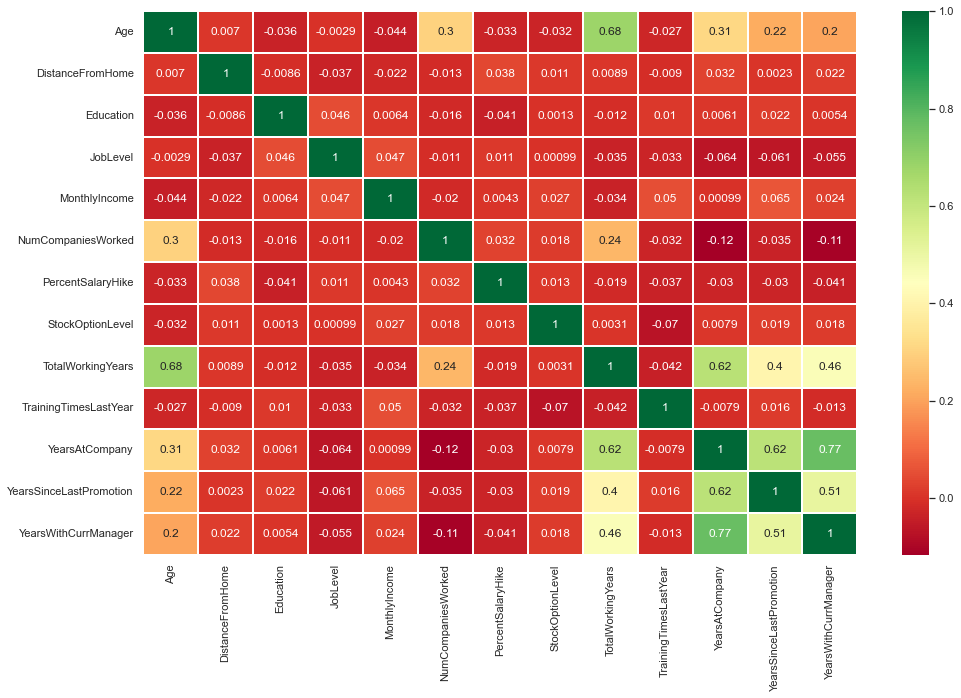

In [49]:
plt.figure(figsize = (16,10))
sns.heatmap(data_cor,cmap ='RdYlGn', linewidths = 0.30, annot = True)

avval ishdan bo'shaganini bilish uchun Attrition ustunidagi malumotlar bilan ishlaymiz

In [55]:
data["Attrition"].value_counts()

No     3699
Yes     711
Name: Attrition, dtype: int64

dataframe uzunligi 4410 qatorga teng

In [63]:
print("Avval ishdan bo'shamaganlar 3699")
print("Avval ishdan bo'shaganlar soni 711")
print(f"avval ishdan bo'shaganlarni nisbati {3699*100/4410}")
print(f"avval ishdan bo'shamaganlarni nisbati {711*100/4410}")

Avval ishdan bo'shamaganlar 3699
Avval ishdan bo'shaganlar soni 711
avval ishdan bo'shaganlarni nisbati 83.87755102040816
avval ishdan bo'shamaganlarni nisbati 16.122448979591837


<AxesSubplot:xlabel='Attrition', ylabel='count'>

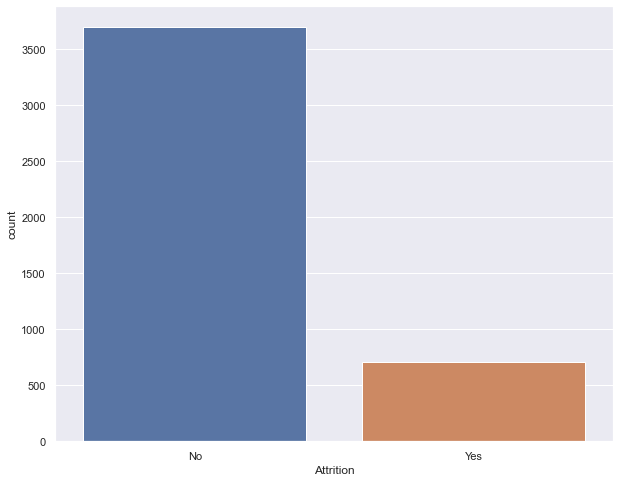

In [67]:
plt.figure(figsize = [10,8])
sns.countplot(x="Attrition" , data=data)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

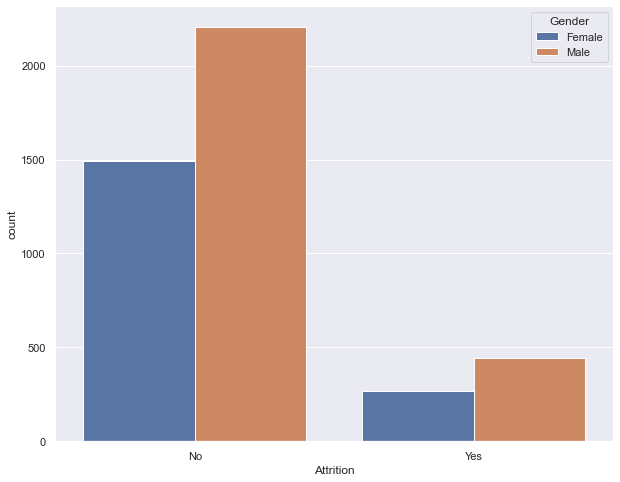

In [70]:
plt.figure(figsize = [10,8])
sns.countplot(x="Attrition" ,hue="Gender", data=data)

<AxesSubplot:xlabel='Attrition', ylabel='count'>

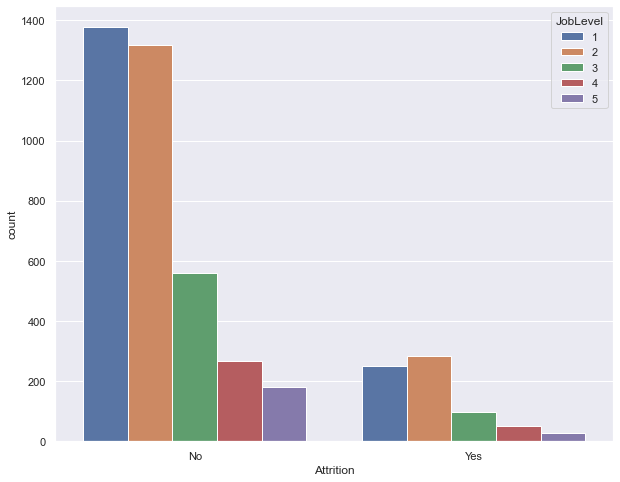

In [71]:
plt.figure(figsize = [10,8])
sns.countplot(x="Attrition" ,hue="JobLevel", data=data)

<AxesSubplot:ylabel='Age'>

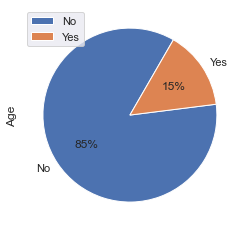

In [82]:
data.groupby(['Attrition']).sum().plot(kind='pie',y='Age', autopct='%1.0f%%', startangle=60)

<AxesSubplot:xlabel='Department', ylabel='count'>

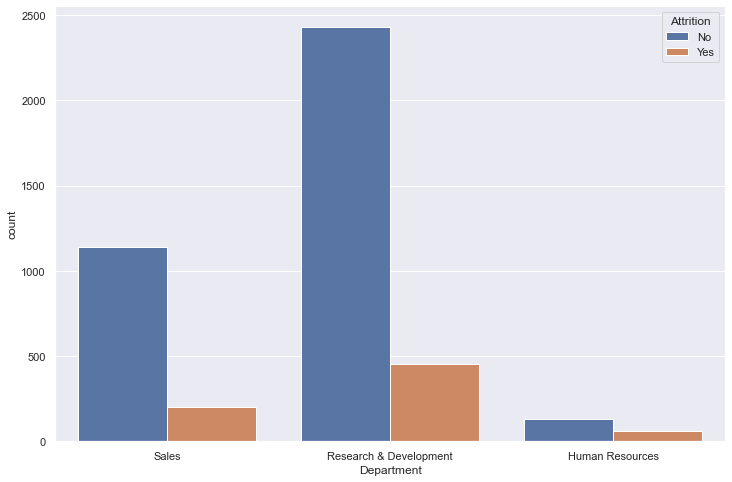

In [84]:
plt.figure(figsize = (12,8))
sns.countplot(x="Department" ,hue="Attrition", data=data)

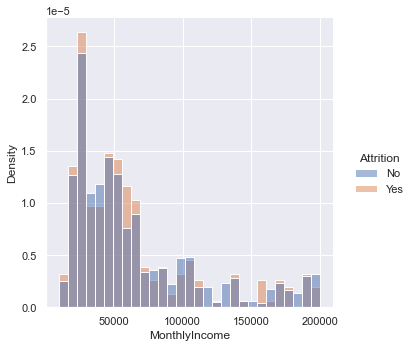

In [86]:
sns.displot(data, x="MonthlyIncome", hue="Attrition", stat="density", common_norm=False)

In [ ]:
yuqoridagi jadvallardan xulosa qilsak xodimlarning ishdan ketishiga asosiy sabab bu  oylik ish haqi bo'lmoqda